# Multiple Variable Linear Regression

Theory : https://youtu.be/EkAQAi3a4js

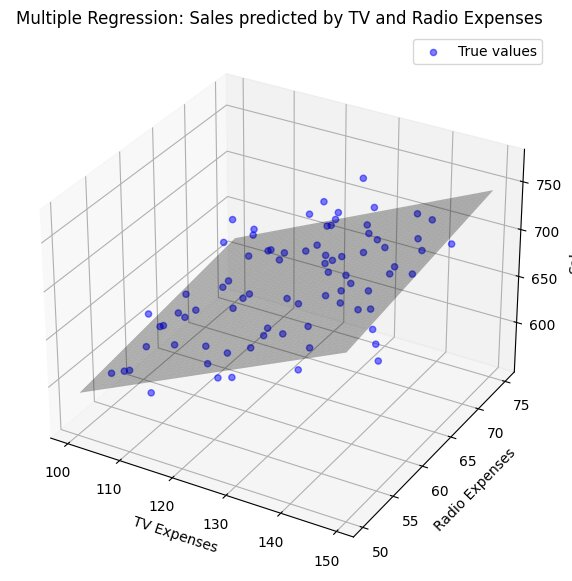

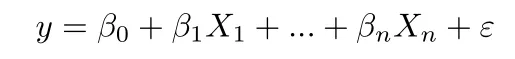

## What new will we learn here?

##### 1. Handling Multiple Variables
##### 2. Assessing Correlations
##### 3. Dropping Unnecessary Columns
##### 4. Dealing with string type data

# Problem Statement

#### Data about the T20 careers of 2006 T20 Batsmen are given. Information like, Number of matches, Number of Innings, Number of Not Outs, Highest Score, Average, Runs scored while Batting First, Strike Rate, Fifties, Hundreds, Fours, Sixes are given.

#### Goal: Predicting the Total Runs scored by a Batsman based on this information. 

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importing Dataset

In [5]:
df = pd.read_csv("t20.csv")
df

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Unnamed: 15
0,0,V Kohli (INDIA),2010-2019,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71,NaN
1,1,RG Sharma (INDIA),2007-2019,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120,NaN
2,2,MJ Guptill (NZ),2009-2019,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113,NaN
3,3,Shoaib Malik (ICC/PAK),2006-2019,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61,NaN
4,4,BB McCullum (NZ),2005-2015,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,1,SG Whittingham (SCOT),2018-2018,3,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2002,2,LJ Woodcock (NZ),2010-2011,3,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2003,3,Zamir Khan (AFG),2012-2012,1,-,-,-,-,-,-,-,-,-,-,-,-,NaN
2004,4,S Zargar (Mex),2019-2019,1,-,-,-,-,-,-,-,-,-,-,-,-,NaN


### Drop Unnecessary Columns

In [6]:
df = df.drop(['Unnamed: 0', "Unnamed: 15", "Player", "Span"], axis=1)
df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,2633,94*,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,3,-,-,-,-,-,-,-,-,-,-,-,-
2002,3,-,-,-,-,-,-,-,-,-,-,-,-
2003,1,-,-,-,-,-,-,-,-,-,-,-,-
2004,1,-,-,-,-,-,-,-,-,-,-,-,-


### Replace Hyphens with 0, Remove *

In [7]:
df['HS'] = df['HS'].str.replace('*', '')
df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,3,-,-,-,-,-,-,-,-,-,-,-,-
2002,3,-,-,-,-,-,-,-,-,-,-,-,-
2003,1,-,-,-,-,-,-,-,-,-,-,-,-
2004,1,-,-,-,-,-,-,-,-,-,-,-,-


In [8]:
df = df.replace('-', 0)
df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,2633,118,32.1,1905,138.21,4,19,6,234,120
2,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,3,0,0,0,0,0,0,0,0,0,0,0,0
2002,3,0,0,0,0,0,0,0,0,0,0,0,0
2003,1,0,0,0,0,0,0,0,0,0,0,0,0
2004,1,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df.dtypes

Mat      int64
Inns    object
NO      object
Runs    object
HS      object
Ave     object
BF      object
SR      object
100     object
50      object
0       object
4s      object
6s      object
dtype: object

In [11]:
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

In [12]:
df.dtypes

Mat       int64
Inns      int64
NO        int64
Runs      int64
HS        int64
Ave     float64
BF        int64
SR      float64
100       int64
50        int64
0         int64
4s        int64
6s        int64
dtype: object

In [13]:
df.isna().sum()

Mat     0
Inns    0
NO      0
Runs    0
HS      0
Ave     0
BF      0
SR      0
100     0
50      0
0       0
4s      0
6s      0
dtype: int64

In [14]:
df

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,2633,118,32.10,1905,138.21,4,19,6,234,120
2,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,3,0,0,0,0,0.00,0,0.00,0,0,0,0,0
2002,3,0,0,0,0,0.00,0,0.00,0,0,0,0,0
2003,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0
2004,1,0,0,0,0,0.00,0,0.00,0,0,0,0,0


## Exploratory Data Analysis (EDA)

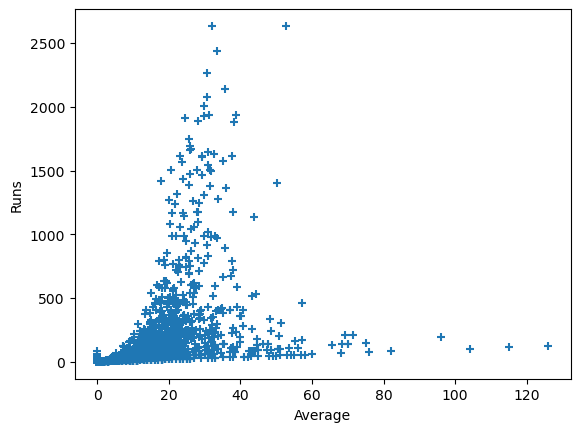

In [16]:
plt.xlabel("Average")
plt.ylabel("Runs")
plt.scatter(df.Ave, df.Runs, marker='+')

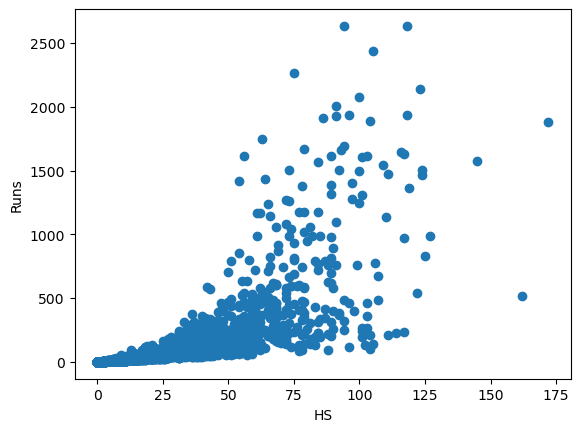

In [17]:
plt.xlabel('HS')
plt.ylabel('Runs')
plt.scatter(df.HS, df.Runs)

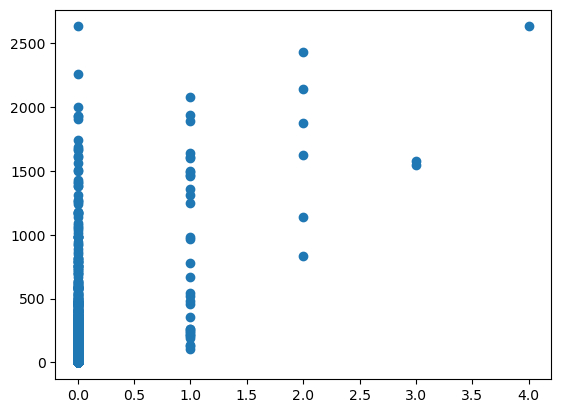

In [18]:
plt.scatter(df['100'], df.Runs)

## Seperate Input and Output

In [19]:
X = df.drop(['Runs'], axis=1)
Y = df['Runs']

In [22]:
X

,Mat,Inns,NO,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,94,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,118,32.10,1905,138.21,4,19,6,234,120
2,83,80,7,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,123,35.66,1571,136.21,2,13,3,199,91
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,3,0,0,0,0.00,0,0.00,0,0,0,0,0
2002,3,0,0,0,0.00,0,0.00,0,0,0,0,0
2003,1,0,0,0,0.00,0,0.00,0,0,0,0,0
2004,1,0,0,0,0.00,0,0.00,0,0,0,0,0


## Train Test Split

In [27]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [28]:
train_X

,Mat,Inns,NO,HS,Ave,BF,SR,100,50,0,4s,6s
367,16,15,2,38,13.46,177,98.87,0,0,0,19,3
1625,4,4,0,1,0.75,16,18.75,0,0,1,0,0
874,4,4,1,16,14.00,59,71.18,0,0,0,5,0
789,9,8,0,19,6.50,77,67.53,0,0,1,2,0
554,7,7,0,32,13.85,93,104.30,0,0,1,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1,1,0,8,8.00,11,72.72,0,0,0,0,0
612,3,3,0,36,27.66,68,122.05,0,0,0,4,5
1447,1,1,0,8,8.00,4,200.00,0,0,0,0,1
677,5,4,0,49,17.25,47,146.80,0,0,1,6,4


## Train a Model

In [29]:
model = LinearRegression()

In [30]:
model.fit(train_X, train_Y)

LinearRegression()

In [31]:
model.predict([[50, 30, 15, 40, 15, 80, 150, 0, 0, 8, 30, 15]])

D:\Anacondd\envs\tf2.5\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([238.46906333])

In [39]:
model.predict([[125, 123, 17, 84, 23.72, 2065, 121.79, 0, 13, 11,255,52]])

D:\Anacondd\envs\tf2.5\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2473.61524503])

## Find the model coeffs

In [33]:
m = model.coef_
c = model.intercept_

In [38]:
df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,75,70,20,2633,94,52.66,1907,138.07,0,24,2,247,71
1,104,96,14,2633,118,32.10,1905,138.21,4,19,6,234,120
2,83,80,7,2436,105,33.36,1810,134.58,2,15,2,215,113
3,111,104,30,2263,75,30.58,1824,124.06,0,7,1,186,61
4,71,70,10,2140,123,35.66,1571,136.21,2,13,3,199,91


### y = m1x1 + m2x2 + m3x3 .... + c

In [34]:
m 

array([-0.53507278,  0.08297824,  4.67625671, -0.0048637 , -0.06144974,
        0.69132087,  0.02288038,  2.30316371,  4.38154803, -2.61468464,
        2.94060524,  4.77238566])